# Assignment Overview


## Background Story  

ABC Insurance, once a market leader, has been noticing a worrying trend in its customer base – a gradual but steady increase in customer churn, alongside a static, sometimes faltering, customer lifetime value. The CEO, in a recent town hall, made it clear: "Our customers are the lifeblood of our business. Understanding them isn't just part of the job — it is the job."

Your task comes directly from the top: The CEO, in collaboration with the head of the marketing department, has formally requested a comprehensive analysis to unearth the hidden patterns within the customer data. They believe that the data holds the key to revitalizing ABC Insurance's customer engagement strategy, tailoring product offerings to individual needs, and ultimately turning the tide on churn.

## Data Description

The IT extracted three tables that contains the available information asked by the Head of Marketing: ABC_df_costumer, ABC_df_demographics, ABC_df_termination. 

Please download the data from: https://novasbe365-my.sharepoint.com/:f:/g/personal/nuno_silva_novasbe_pt/Ekl41SdwtkVOiW52LsaEy5QBo1mjQXHZKwKMeNSJRbEu3g?e=tgkSYD 

### Dataframes details 

#### df_customer:

Contains details about the customers, including their ID, address, policy start dates, and the current annual amounts for car, health, and house insurance.

##### Variables
INDIVIDUAL_ID: Unique identifier for the customer.

ADDRESS_ID: Address identifier for the customer.

CUST_ORIG_DATE: The original date when the customer joined.

DATE_OF_BIRTH: Customer's date of birth.

SOCIAL_SECURITY_NUMBER: Customer's SSN (for identification).

CUST_START_DATE: The start date of the customer's current policy.

CURR_ANN_AMT_CAR: Current annual amount paid for car insurance.

CURR_ANN_AMT_HEALTH: Current annual amount paid for health insurance.

CURR_ANN_AMT_HOUSE: Current annual amount paid for house insurance.


#### df_demographics:
Includes demographic information about the customers, such as income, family status, home ownership, and credit rating.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

INCOME: Customer's income.

HAS_CHILDREN: Indicates if the customer has children.

LENGTH_OF_RESIDENCE: How long the customer has lived in their current residence.

MARITAL_STATUS: Customer's marital status.

HOME_MARKET_VALUE: Market value of the customer's home.

HOME_OWNER: Indicates if the customer owns their home.

COLLEGE_DEGREE: Indicates if the customer has a college degree.

GOOD_CREDIT: Indicates if the customer has good credit.

ADVANCED_STUDIES: Indicates if the customer has pursued advanced studies.


#### df_termination:

Lists customers who have suspended their policies, including the suspension date.

##### Variables

INDIVIDUAL_ID: Unique identifier for the customer (links to df_customer).

SUSPD_DATE: The date when the customer's policy was suspended.

## Question 1: Data Quality and Customer Understanding (30 points)

#### Background: Before delving into sophisticated analyses and model building, ensuring the integrity and quality of data is paramount. The provided datasets are critical for understanding ABC Insurance's clientele but may contain issues affecting their utility for further analysis.

#### Q1.1 Please perform the exploratory data analysis of the data. (20 points)

What specific metrics and techniques did you use to assess the quality of the data in each dataset? Describe the issues you identified in the datasets. For each issue, detail the impact it could have on analysis and decision-making processes. After cleaning, how did the data quality improve? Present metrics or observations to demonstrate the improvement in data quality.

In [2]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 

In [3]:
# Loading the filepath to the databases 
file_path1 =os.path.join('DATA', 'ABC_df_customer.csv')
file_path2 = os.path.join('DATA', 'ABC_df_demographic.csv')
file_path3 = os.path.join('DATA', 'ABC_df_termination.csv')

#Generating the dataframes 
df_customer = pd.read_csv(file_path1)
df_demographic = pd.read_csv(file_path2)
df_termination= pd.read_csv(file_path3)

# Displaying the dataframes 
display(df_customer, df_demographic, df_termination)

/var/folders/_j/f96rrhbn7sn9rhplqnfbww180000gn/T/ipykernel_13441/4172348931.py:7: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_customer = pd.read_csv(file_path1)


,Unnamed: 0,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE
0,0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411
1,1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414
2,2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442
3,3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463
4,4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366
...,...,...,...,...,...,...,...,...,...,...
2303119,2303119,2.213003e+11,5.213001e+11,2014-02-15,1967-07-07,882-XX-4608,NaN,1361.290041,623.368014,426
2303120,2303120,2.213031e+11,5.213013e+11,2022-02-16,1965-05-26,709-XX-1726,NaN,1563.921158,997.482828,507
2303121,2303121,2.213013e+11,5.213005e+11,2019-08-16,1967-07-07,317-XX-1336,NaN,1128.048444,393.819352,300
2303122,2303122,2.213021e+11,5.213008e+11,2005-09-11,1948-10-31,110-XX-9215,NaN,1380.204016,556.785305,424


,Unnamed: 0,INDIVIDUAL_ID,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES
0,0,2.213028e+11,187500.000,1.0,8.0,Single,300000 - 349999,1,1,1,Y
1,1,2.213032e+11,63750.000,0.0,0.0,Single,NaN,0,0,0,N
2,2,2.213032e+11,41250.000,0.0,15.0,Married,75000 - 99999,1,0,1,N
3,3,2.213032e+11,120558.264,0.0,0.0,NaN,1000 - 24999,1,0,0,N
4,4,2.213032e+11,187500.000,0.0,0.0,NaN,NaN,0,0,1,Y
...,...,...,...,...,...,...,...,...,...,...,...
2112574,2112574,2.213006e+11,131250.000,1.0,12.0,Married,50000 - 74999,1,0,1,N
2112575,2112575,2.213006e+11,56250.000,1.0,5.0,Single,50000 - 74999,0,0,1,N
2112576,2112576,2.213006e+11,187500.000,0.0,13.0,Married,225000 - 249999,1,1,1,N
2112577,2112577,2.213006e+11,187500.000,2.0,12.0,Married,100000 - 124999,1,0,1,Y


,Unnamed: 0,INDIVIDUAL_ID,SUSPD_DATE
0,0,2.213026e+11,2022-10-09
1,1,2.213028e+11,2022-04-24
2,2,2.213027e+11,2022-05-21
3,3,2.213002e+11,2022-04-27
4,4,2.213026e+11,2022-09-16
...,...,...,...
269254,269254,2.213022e+11,2022-01-09
269255,269255,2.213007e+11,2022-02-27
269256,269256,2.213030e+11,2022-03-21
269257,269257,2.213025e+11,2022-02-26


In [6]:
# Merging the datasets 
df_merged = df_customer.merge(df_demographic, on= 'INDIVIDUAL_ID', how= 'outer')
df = df_merged.merge(df_termination, on= 'INDIVIDUAL_ID', how= 'outer').copy()

# Dropping irrelevant columns 
df.drop(columns=['Unnamed: 0_x', 'Unnamed: 0_y', 'Unnamed: 0'], inplace=True)

In [7]:
df = df.copy()
df

,INDIVIDUAL_ID,ADDRESS_ID,CUST_ORIG_DATE,DATE_OF_BIRTH,SOCIAL_SECURITY_NUMBER,CUST_START_DATE,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,HAS_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_MARKET_VALUE,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,SUSPD_DATE
0,2.213000e+11,5.213000e+11,2018-12-09,1978-06-23,608-XX-7640,2018-12-09,1318.877997,517.999317,411.0,33750.0,2.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,N,NaN
1,2.213001e+11,5.213001e+11,2018-01-02,1950-05-30,342-XX-6908,2018-01-02,1474.199182,558.417779,414.0,41250.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,N,NaN
2,2.213007e+11,5.213002e+11,2009-09-23,1967-07-07,240-XX-9224,2009-09-23,1467.375112,701.649310,442.0,63750.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,N,NaN
3,2.213016e+11,5.213006e+11,2022-07-25,1969-05-25,775-XX-6249,2022-07-25,1492.409561,401.517490,463.0,187500.0,2.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,N,2021-12-22
4,2.213016e+11,5.213006e+11,2006-10-11,1972-09-25,629-XX-7298,2006-10-11,1284.633494,772.857222,366.0,131250.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,Y,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303143,2.213020e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18750.0,1.0,7.0,Single,25000 - 49999,1.0,0.0,0.0,N,NaN
2303144,2.213028e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131250.0,1.0,14.0,Married,175000 - 199999,1.0,1.0,1.0,Y,NaN
2303145,2.213028e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,131250.0,2.0,10.0,Married,175000 - 199999,1.0,1.0,1.0,Y,NaN
2303146,2.213009e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41250.0,1.0,1.0,Married,50000 - 74999,0.0,0.0,1.0,N,NaN


### Completeness analysis - Missing values 

In [8]:
# Checking for missing values inside the dataframes 
missing_values = df.isna().sum() 

# Getting the relatives values for each dataframe 
percentage_missing_values = (df.isna().sum() / len(df)) 
percentage_missing_values = percentage_missing_values.round(2)  # Rounds the values to 2 decimal places

# Displaying the results 
display(missing_values, percentage_missing_values)

INDIVIDUAL_ID                   1
ADDRESS_ID                     25
CUST_ORIG_DATE                 24
DATE_OF_BIRTH                  24
SOCIAL_SECURITY_NUMBER         24
CUST_START_DATE             91237
CURR_ANN_AMT_CAR               24
CURR_ANN_AMT_HEALTH            24
CURR_ANN_AMT_HOUSE             24
INCOME                     169439
HAS_CHILDREN               169439
LENGTH_OF_RESIDENCE        169439
MARITAL_STATUS             605336
HOME_MARKET_VALUE          361587
HOME_OWNER                 169439
COLLEGE_DEGREE             169439
GOOD_CREDIT                169439
ADVANCED_STUDIES           169439
SUSPD_DATE                2033988
dtype: int64

INDIVIDUAL_ID             0.00
ADDRESS_ID                0.00
CUST_ORIG_DATE            0.00
DATE_OF_BIRTH             0.00
SOCIAL_SECURITY_NUMBER    0.00
CUST_START_DATE           0.04
CURR_ANN_AMT_CAR          0.00
CURR_ANN_AMT_HEALTH       0.00
CURR_ANN_AMT_HOUSE        0.00
INCOME                    0.07
HAS_CHILDREN              0.07
LENGTH_OF_RESIDENCE       0.07
MARITAL_STATUS            0.26
HOME_MARKET_VALUE         0.16
HOME_OWNER                0.07
COLLEGE_DEGREE            0.07
GOOD_CREDIT               0.07
ADVANCED_STUDIES          0.07
SUSPD_DATE                0.88
dtype: float64

After analyzing the missing values in the data across different columns, it becomes evident that the distribution of missing values varies significantly across the dataset, impacting potential analyses in distinct ways:

- **Customer Information:** The most noteworthy observation is the 'CUST_START_DATE' column, which has 91,237 missing entries, translating to approximately 3.96% of the total data. This gap is significant because the start date of a customer is pivotal for any time-series analysis or evaluations concerning the customer's lifecycle and their value over time. Missing this information could obstruct efforts to accurately gauge customer engagement and retention strategies.

- **Demographic Details:** Within the demographic data, two columns stand out due to their considerable number of missing values: 'MARITAL_STATUS' and 'HOME_MARKET_VALUE', with 605,336 and 361,587 missing entries, respectively. These represent 26.28% and 15.70% of the data, highlighting a considerable void in critical customer segmentation information. Marital status and home market value are often utilized to profile and segment customers effectively; missing such data could impede precise customer segmentation and targeted marketing efforts.

- **Termination Information:** The 'SUSPD_DATE' column in the termination database exhibits a notably high percentage of missing values at 88.31%, with 2,033,988 entries lacking. This absence is particularly concerning for churn analysis, where understanding the timing and patterns of customer terminations is crucial. Such a significant proportion of missing data in this column can severely limit the ability to perform accurate churn predictions and analyses, potentially affecting strategic decisions regarding customer retention policies and practices.

Overall, the presence of missing values, especially in key columns like 'CUST_START_DATE', 'MARITAL_STATUS', 'HOME_MARKET_VALUE', and 'SUSPD_DATE', underscores the necessity for meticulous data cleaning and imputation strategies. Addressing these gaps is essential for enabling comprehensive analyses that could inform more effective customer management and retention strategies.

### Consistency analysis - Formatting

In [9]:
df = df.copy()

In [13]:
# Checking 'INDIVIDUAL_ID' and 'ADDRESS_ID' type 

print(df['INDIVIDUAL_ID'].dtype, df['ADDRESS_ID'].dtype)

float64 float64


In [11]:
# Renaming the "HAS_CHILDREN" column to N_CHILDREN
df.rename(columns={'HAS_CHILDREN': 'N_CHILDREN'}, inplace=True)

# Create a new column 'HAS_CHILDREN' based on 'N_CHILDREN' values
df['HAS_CHILDREN'] = df['N_CHILDREN'].apply(lambda x: 0 if x == 0 else 1)

The column 'HAS_CHILDREN' initially contained 6 values: from 0 to 6.0, that we assume indicated the number of children, but in the column description the column was intended to inform if the customer had or didnt have children, therefore we renamed the column to 'N_CHILDREN', indicating the number of children of the customer and created a new column, called 'HAS_CHILDREN' with binary values indicating the presence or not of children.

In [12]:
# Transforming "Y" and "N" values in the "ADVANCED_STUDIES" column into a binary variable
df['ADVANCED_STUDIES'] = df['ADVANCED_STUDIES'].map({'Y': 1, 'N': 0})

# Transforming "Married" and "Single" values in the "MARITAL_STATUS" column into a binary variable
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].map({'Married': 1, 'Single': 0})

We transformed the 'ADVANCED_STUDIES' and 'MARITAL_STATUS' values into dummy variables, where 0 corresponds to not having attended advanced studies or being single and 1 the contrary.

In [13]:
print(len(df_demographic['ADVANCED_STUDIES'].value_counts()) > 2,
len(df_demographic['COLLEGE_DEGREE'].value_counts()) > 2,
len(df_demographic['HOME_OWNER'].value_counts()) >2 ,
len(df_demographic['GOOD_CREDIT'].value_counts()) > 2)


False False False False


In [14]:
# Checking which columns have mixed types in the costumer dataset 
for column in df.columns:
    if df[column].apply(type).nunique() > 1:
        print(f"Column '{column}' has mixed types.")
    else:
        print(f"Column '{column}' does not have mixed types.")


Column 'INDIVIDUAL_ID' does not have mixed types.
Column 'ADDRESS_ID' does not have mixed types.
Column 'CUST_ORIG_DATE' does not have mixed types.
Column 'DATE_OF_BIRTH' does not have mixed types.
Column 'SOCIAL_SECURITY_NUMBER' does not have mixed types.
Column 'CUST_START_DATE' does not have mixed types.
Column 'CURR_ANN_AMT_CAR' does not have mixed types.
Column 'CURR_ANN_AMT_HEALTH' does not have mixed types.
Column 'CURR_ANN_AMT_HOUSE' does not have mixed types.
Column 'INCOME' does not have mixed types.
Column 'N_CHILDREN' does not have mixed types.
Column 'LENGTH_OF_RESIDENCE' does not have mixed types.
Column 'MARITAL_STATUS' does not have mixed types.
Column 'HOME_MARKET_VALUE' does not have mixed types.
Column 'HOME_OWNER' does not have mixed types.
Column 'COLLEGE_DEGREE' does not have mixed types.
Column 'GOOD_CREDIT' does not have mixed types.
Column 'ADVANCED_STUDIES' does not have mixed types.
Column 'SUSPD_DATE' has mixed types.
Column 'HAS_CHILDREN' does not have mixe

All the column in the dataframes have only one type of values and all the column with binary values correctly have only 0 and 1 values (The column "SUSP_DATE" with mixed datatypes can be explained by the presence of missing values).

In [15]:
# Convert all the dates in DateTime format
df['CUST_START_DATE'] = pd.to_datetime(df['CUST_START_DATE'])
df['CUST_ORIG_DATE'] = pd.to_datetime(df['CUST_ORIG_DATE'])
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['SUSPD_DATE'] = pd.to_datetime(df['SUSPD_DATE'])

Successfully changed the datatype of all the "Date" columns from string to DateTime

In [16]:
# Process the 'HOME_MARKET_VALUE' column
# Split the string by the dash and expand to new columns
df[['low_HOME_MARKET_VALUE', 'high_HOME_MARKET_VALUE']] = df['HOME_MARKET_VALUE'].str.split(' - ', expand=True)

# Convert the split strings to numeric values, coerce errors to NaN
df['low_HOME_MARKET_VALUE'] = pd.to_numeric(df['low_HOME_MARKET_VALUE'], errors='coerce')
df['high_HOME_MARKET_VALUE'] = pd.to_numeric(df['high_HOME_MARKET_VALUE'], errors='coerce')

# Calculate the midpoint of the range
df['average_HOME_MARKET_VALUE'] = (df['low_HOME_MARKET_VALUE'] + df['high_HOME_MARKET_VALUE']) / 2

# Now, if you need to convert this midpoint to an integer, you can do so safely since NaNs will not raise an error
df['average_HOME_MARKET_VALUE'] = df['average_HOME_MARKET_VALUE'].astype(int, errors='ignore')

# Check if a 'price' column is always positive and has two decimal places
(df['average_HOME_MARKET_VALUE'] > 0).value_counts()

True     1602700
False       1872
Name: average_HOME_MARKET_VALUE, dtype: int64

In [17]:
# Filter the dataframe to show only rows where 'average_HOME_MARKET_VALUE' is negative
negative_values_df = df[df['average_HOME_MARKET_VALUE'] < 0]

# Display the rows with negative 'average_HOME_MARKET_VALUE'
negative_values_df[['average_HOME_MARKET_VALUE']].sum()


average_HOME_MARKET_VALUE    0.0
dtype: float64

In [18]:
# Drop rows where the "HOME_MARKET_VALUE" column has missing values
df = df.drop(subset= ['HOME_MARKET_VALUE'], axis= 1)

# Dropping 'Column1' and 'Column2' from the DataFrame
df = df.drop(['low_HOME_MARKET_VALUE', 'high_HOME_MARKET_VALUE'], axis=1)

In [19]:
df = df.dropna(subset= ['average_HOME_MARKET_VALUE'])

The "HOUSE_MARKET_VALUE" Column was initialy formatted as string, this could lead to some problems if later we want to do some mathematical operations on the column, therefore we decided to get the average of the two values, as the column shows a price range. Later we performed a negativity check that outputted 2565 false values, however when directly checking for negative values the dataframe was empty, therefore all the false values of the negativity check can be explained by NA values that generated during the creation of the average_HOME_MARKET_VALUE column by coercing the errors.
The decision was then to drop this newly generated missing values 

The consistency analysis conducted on the dataset involved several key steps to ensure data quality and adherence to domain rules.
The dataset presented some inconsistencies in the format of some features and some other features were in the wrong type, but by changing the datatype of 'INDIVIDUAL_ID' and 'ADDRESS_ID' to integers, the analysis was simplified. The transformation of the 'HAS_CHILDREN' column into 'N_CHILDREN' and the creation of a binary 'HAS_CHILDREN' column improved clarity regarding the presence of children. The conversion of 'ADVANCED_STUDIES' and 'MARITAL_STATUS' into dummy variables, and the standardization of binary values across columns further aligned the data with domain constraints. 
The successful change of 'Date' columns to DateTime format and the handling of the 'HOUSE_MARKET_VALUE' column by calculating averages and addressing negative values indicate a thorough effort to maintain consistency. This process not only enhanced data clarity but also ensured that all columns conform to expected formats and value ranges, crucial for accurate and reliable analysis.

### Uniqueness analysis - Duplicated values 

In [20]:
# Finding duplicates based on 'INDIVIDUAL_ID'
duplicates = df[df.duplicated(subset= ['INDIVIDUAL_ID', 'CUST_START_DATE'], keep=False)]

# Sorting by 'INDIVIDUAL_ID' to compare adjacent rows easily
duplicates = duplicates.sort_values('INDIVIDUAL_ID')

# Dropping duplicates based only on 'INDIVIDUAL_ID' and 'START_DATE', keeping the first occurrence
df = df.drop_duplicates(subset=['INDIVIDUAL_ID', 'CUST_START_DATE'], keep='first')


We started by identifying duplicates based on both 'INDIVIDUAL_ID' and 'CUST_ORIG_DATE' columns, pinpointing specific instances of duplication. We decided to focus on the rows with duplicates in both the mentioned columns because if two rows share the same customer ID but different start date could be simply that the customer changed his policy. 
Finally, we executed a process to remove these specific duplicates while retaining the first occurrence, thereby refining our dataset to eliminate redundant information without losing unique data points. This meticulous approach to handling duplicates based on multiple criteria significantly contributes to the data's integrity and usefulness for analysis.

### Timeliness - Temporal features

In [21]:
df.CUST_START_DATE.describe()

/var/folders/_j/f96rrhbn7sn9rhplqnfbww180000gn/T/ipykernel_12515/1736416149.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.CUST_START_DATE.describe()


count                 1586765
unique                  17639
top       2005-09-11 00:00:00
freq                   440856
first     1985-09-16 00:00:00
last      2041-10-20 00:00:00
Name: CUST_START_DATE, dtype: object

In [22]:
# Drop rows with CUST_START_DATE in the future
df = df[df['CUST_START_DATE'] <= datetime.now()]


In [23]:
df.CUST_ORIG_DATE.describe()

/var/folders/_j/f96rrhbn7sn9rhplqnfbww180000gn/T/ipykernel_12515/4033091661.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.CUST_ORIG_DATE.describe()


count                 1563645
unique                   5240
top       2005-09-11 00:00:00
freq                   472020
first     2005-09-11 00:00:00
last      2022-11-12 00:00:00
Name: CUST_ORIG_DATE, dtype: object

In [24]:
# Drop rows where CUST_ORIG_DATE is more recent than CUST_START_DATE
df = df[df['CUST_ORIG_DATE'] <= df['CUST_START_DATE']]

During the timeliness analysis we discovered that there were rows with starting date in the future, rows where the origin date was more recent than the starting date, and rows were the suspension date was before the starting date therefore as these values were impossible we decided to drop those rows.

### Feature Engineering 

In [25]:
# Calculate age as the difference between the current date and the DOB, then extract years
df['Age'] = (datetime.now() - df['DATE_OF_BIRTH']).dt.days // 365

In [62]:
# Calculate the number of days since the customer started the current policy
df['DAYS_SINCE_POLICY_START'] = (datetime.now() - df['CUST_START_DATE']).dt.days

# Calculate the number of days the customer has been with the company
df['DAYS_AS_CUSTOMER'] = (datetime.now() - df['CUST_ORIG_DATE']).dt.days

# Transforming 'SUSPD_DATE' column: 0 for missing values, 1 for not missing values.

# To fill NaN values with 0 for specific columns, you should use column indexing
df['SUSPD_DATE'] = df['SUSPD_DATE'].fillna(0)

# To transform all values that are not 0 into 1 for the 'SUSPD_DATE' column, you can use the following approach:
df['SUSPD_DATE'] = df['SUSPD_DATE'].apply(lambda x: 1 if x != 0 else 0)

For the feature engineering we generated 3 new columns: Age of the customer, derived from the Date of Birth, the count of days since the policy started and the count of days since the client became a customer, respectively from 'CUST_START_DATE' and 'CUST_ORIG_DATE'.
Lastly we transformed all the na values in 'SUSPD_DATE' to 0 and all the other values to 1, thus making it a dummy variable, a necessary step for the development of the churn analysis

### Univariate analysis - Numeric variables 

##### CURR_ANN_AMT_CAR


In [28]:
df.CURR_ANN_AMT_CAR.describe().apply(lambda x: f"{x:,.2f}")

count    1,508,182.00
mean         1,444.03
std            247.24
min            305.69
25%          1,275.45
50%          1,438.90
75%          1,607.39
max          2,769.37
Name: CURR_ANN_AMT_CAR, dtype: object

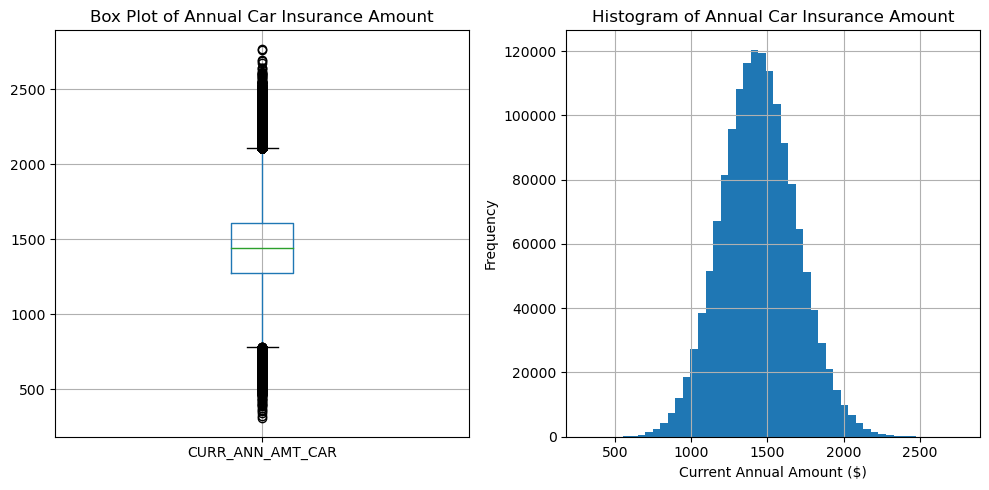

In [29]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='CURR_ANN_AMT_CAR')
plt.title('Box Plot of Annual Car Insurance Amount')

# Histogram
plt.subplot(1, 2, 2)
df['CURR_ANN_AMT_CAR'].hist(bins=50)
plt.title('Histogram of Annual Car Insurance Amount')
plt.xlabel('Current Annual Amount ($)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The majority of annual car insurance payments cluster around $1,437.12, with most values falling within a relatively narrow range as indicated by the standard deviation. There are some outliers, particularly on the higher end, but these do not dominate the dataset. The relatively close alignment of the mean and median suggests a symmetrical distribution of insurance amounts among the population sampled.

##### CURR_ANN_AMT_HEALTH

In [30]:
df.CURR_ANN_AMT_HEALTH.describe().apply(lambda x: f"{x:,.2f}")

count    1,508,182.00
mean           577.62
std            190.35
min           -351.62
25%            448.87
50%            577.06
75%            705.84
max          1,617.53
Name: CURR_ANN_AMT_HEALTH, dtype: object

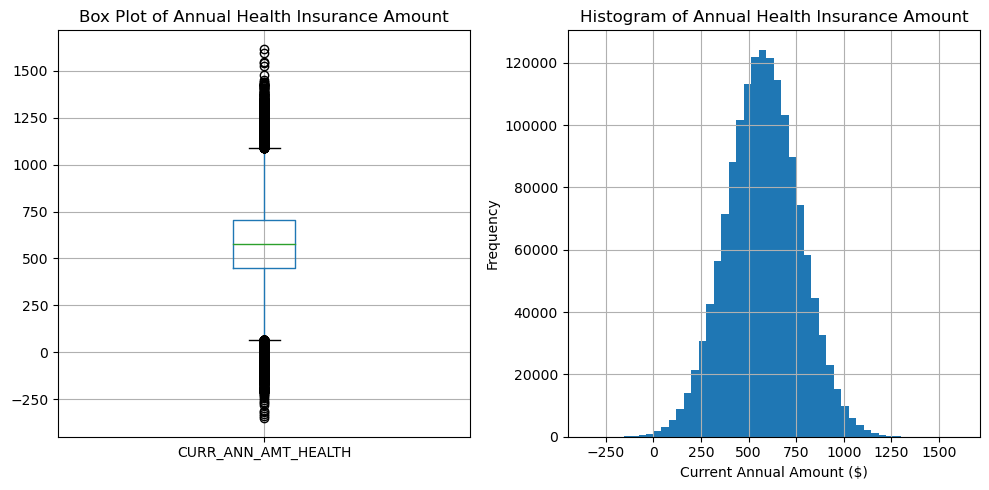

In [31]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='CURR_ANN_AMT_HEALTH')
plt.title('Box Plot of Annual Health Insurance Amount')

# Histogram
plt.subplot(1, 2, 2)
df['CURR_ANN_AMT_HEALTH'].hist(bins=50)
plt.title('Histogram of Annual Health Insurance Amount')
plt.xlabel('Current Annual Amount ($)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

In [32]:
# Drop rows where CUST_ORIG_DATE is more recent than CUST_START_DATE
df = df[df['CURR_ANN_AMT_HEALTH'] >= 0]

The health insurance payments data shows a central clustering around $574.96, with most of the payments spread within a narrower range than the car insurance payments. The close alignment of the mean and median supports the symmetry in the distribution. The negative values suggest data errors or specific cases that required dropping. The higher-end outliers are present but are not as significant in number as to overly skew the distribution.

##### CURR_ANN_AMT_HOUSE

In [33]:
df.CURR_ANN_AMT_HOUSE.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean           433.36
std             76.94
min             92.00
25%            381.00
50%            431.00
75%            484.00
max            866.00
Name: CURR_ANN_AMT_HOUSE, dtype: object

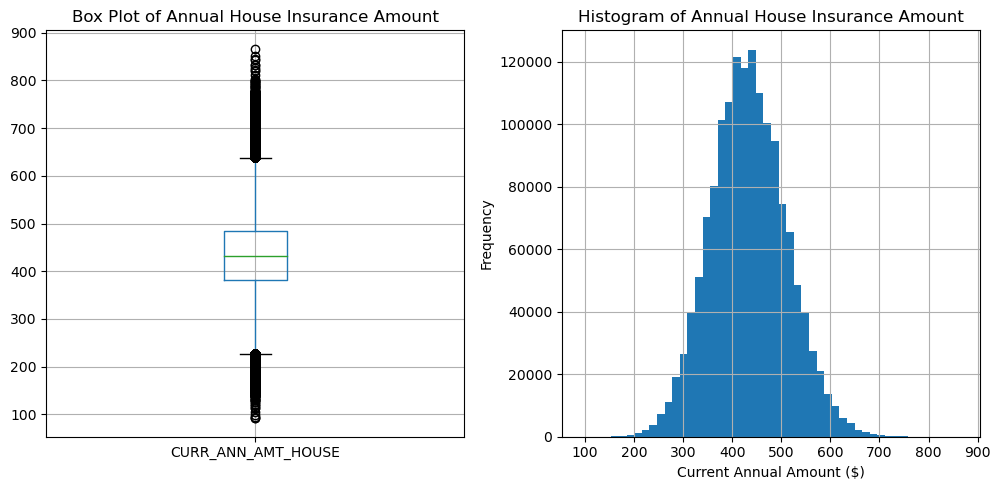

In [34]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='CURR_ANN_AMT_HOUSE')
plt.title('Box Plot of Annual House Insurance Amount')

# Histogram
plt.subplot(1, 2, 2)
df['CURR_ANN_AMT_HOUSE'].hist(bins=50)
plt.title('Histogram of Annual House Insurance Amount')
plt.xlabel('Current Annual Amount ($)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

the annual house insurance payments are relatively tightly grouped around the mean of $431.14, with the majority of payments within a small range as indicated by the lower standard deviation. The median is very close to the mean, pointing to a symmetric distribution. Outliers are present but not overly influential in The dataset, and there are no negative values, which suggests cleaner data compared to the health insurance column.

##### INCOME

In [35]:
df.INCOME.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean       122,750.23
std         81,883.47
min          7,500.00
25%         71,250.00
50%        105,000.00
75%        131,250.00
max        375,000.00
Name: INCOME, dtype: object

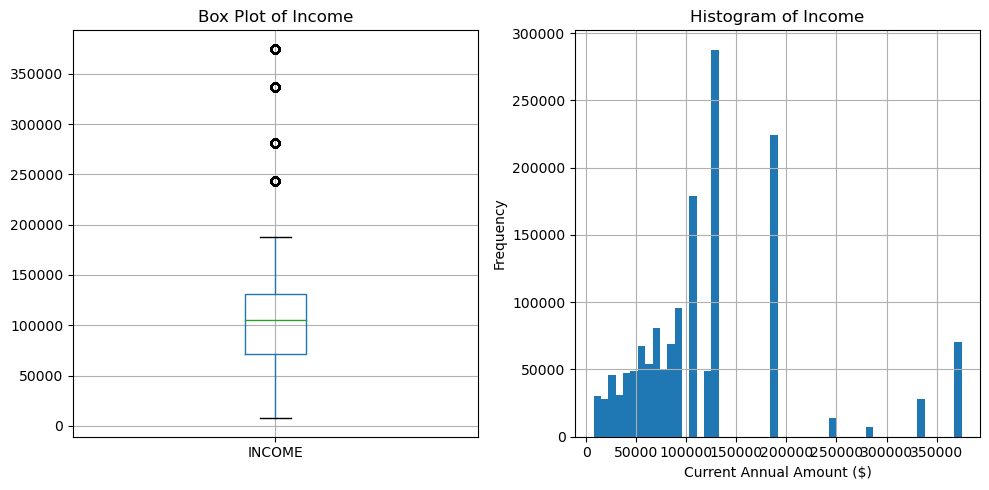

In [36]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='INCOME')
plt.title('Box Plot of Income')

# Histogram
plt.subplot(1, 2, 2)
df['INCOME'].hist(bins=50)
plt.title('Histogram of Income')
plt.xlabel('Current Annual Amount ($)')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The data on income shows a wide variation with a substantial spread around the average income of $121,486.79. The median and mean are close, pointing to a distribution that is not heavily skewed. However, the presence of high earners and the multi-modal nature of the histogram indicates that the population may not be homogenous in terms of income. The standard deviation is quite large relative to the mean, indicating significant income disparity within the dataset.

##### N_CHILDREN

In [37]:
df.N_CHILDREN.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean             0.56
std              0.60
min              0.00
25%              0.00
50%              1.00
75%              1.00
max              6.00
Name: N_CHILDREN, dtype: object

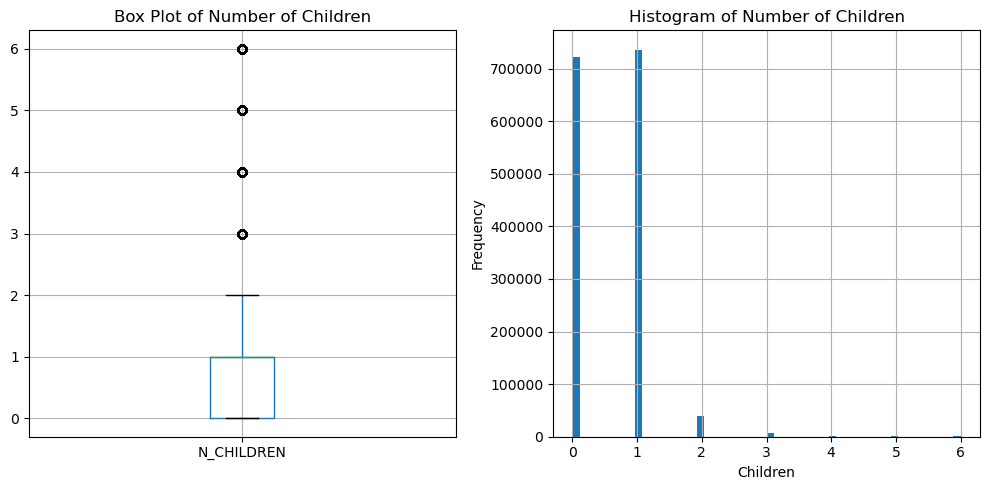

In [38]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='N_CHILDREN')
plt.title('Box Plot of Number of Children')

# Histogram
plt.subplot(1, 2, 2)
df['N_CHILDREN'].hist(bins=50)
plt.title('Histogram of Number of Children')
plt.xlabel('Children')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The number of children per individual in this dataset is skewed towards 0, with a mean of 0.48 and a median of 0. There is a small standard deviation, meaning that while there is some variability, the number of children is typically low. The presence of outliers with up to 6 children does not significantly alter the overall distribution. Given the skewness of the data and the fact that the number of children is a count variable, there may be not need to normalize this feature for regression analysis.

##### DAYS_SINCE_POLICY_START

In [39]:
df.DAYS_SINCE_POLICY_START.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean         4,044.59
std          2,342.20
min              0.00
25%          1,841.00
50%          4,084.00
75%          6,745.00
max          6,745.00
Name: DAYS_SINCE_POLICY_START, dtype: object

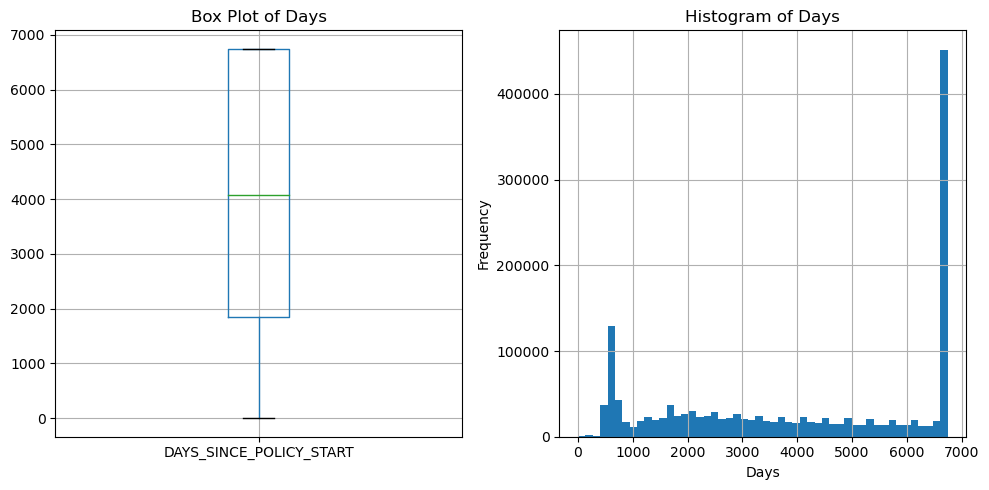

In [40]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='DAYS_SINCE_POLICY_START')
plt.title('Box Plot of Days')

# Histogram
plt.subplot(1, 2, 2)
df['DAYS_SINCE_POLICY_START'].hist(bins=50)
plt.title('Histogram of Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The 'DAYS_SINCE_POLICY_START' data indicates a right-skewed distribution, with customers holding policies for an average of nearly 11 years, but with a wide range in tenure and significant outliers. These outliers suggest long-standing loyalty among some customers, while the spread points to varying lengths of customer relationships and insurance needs. 


##### DAYS_AS_CUSTOMER

In [41]:
df.DAYS_AS_CUSTOMER.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean         4,099.93
std          2,340.55
min            474.00
25%          1,899.00
50%          4,211.00
75%          6,745.00
max          6,745.00
Name: DAYS_AS_CUSTOMER, dtype: object

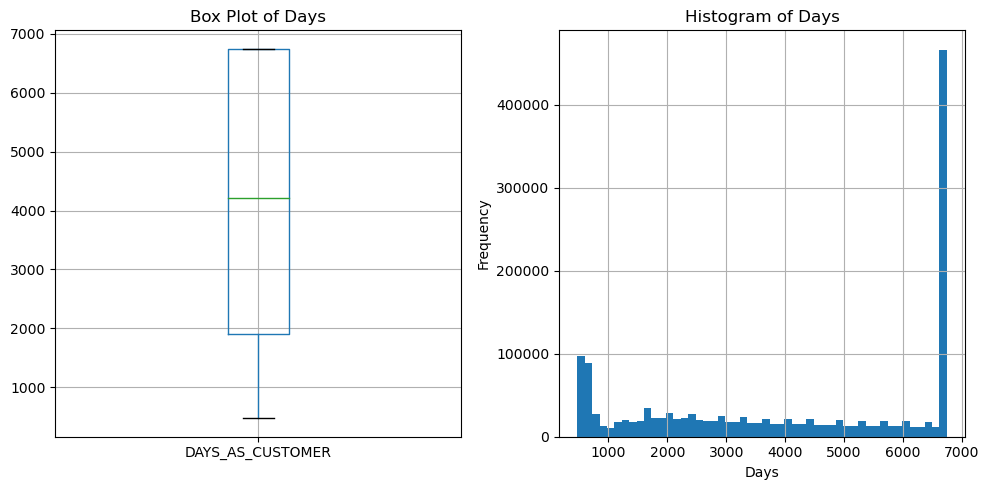

In [42]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='DAYS_AS_CUSTOMER')
plt.title('Box Plot of Days')

# Histogram
plt.subplot(1, 2, 2)
df['DAYS_AS_CUSTOMER'].hist(bins=50)
plt.title('Histogram of Days')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

ABC Insurance's 'DAYS_AS_CUSTOMER' data reveals an average tenure of nearly 11 years, with a broad spread of customer durations. The distribution is truncated at 18.5 years, indicating no extreme long-term outliers and suggesting a cap in data recording. This portrays a stable customer base with enduring loyalty, crucial for the company's sustained profitability and retention strategy effectiveness. No anomalies such as negative values suggest clean and reliable data.

##### LENGTH_OF_RESIDENCE

In [43]:
df.LENGTH_OF_RESIDENCE.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean             7.92
std              4.97
min              0.00
25%              4.00
50%              7.00
75%             13.00
max             15.00
Name: LENGTH_OF_RESIDENCE, dtype: object

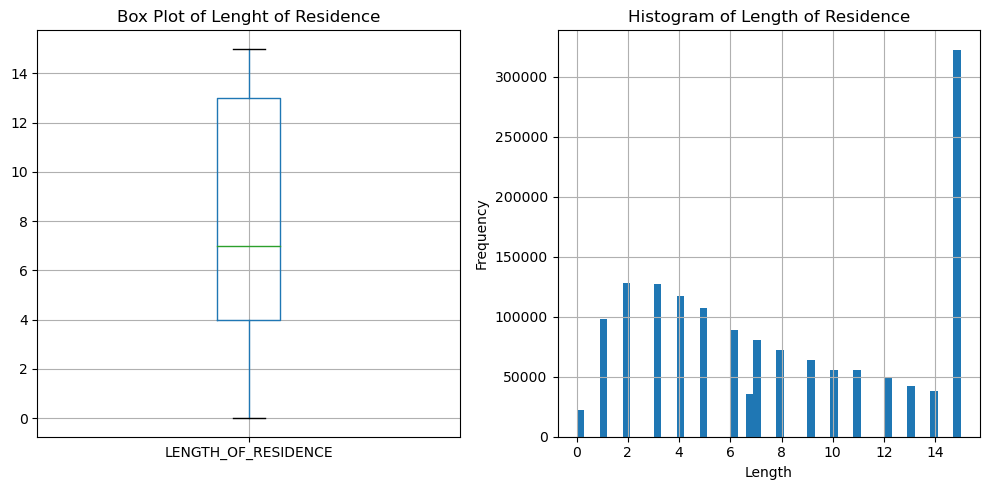

In [44]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='LENGTH_OF_RESIDENCE')
plt.title('Box Plot of Lenght of Residence')

# Histogram
plt.subplot(1, 2, 2)
df['LENGTH_OF_RESIDENCE'].hist(bins=50)
plt.title('Histogram of Length of Residence')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The data shows that individuals tend to stay in their residence for an average of just over 7 years, with a moderate level of variability. The distribution has a slight right skew, with more individuals residing for shorter lengths of time and fewer residing for very long periods. Given the range of values and the presence of multiple peaks in the distribution, normalization may not be necessary for regression analysis, depending on the other features in your model and the regression technique used. If the length of residence is used as a predictor and the model is sensitive to the scale of the features (like K-Nearest Neighbors or neural networks), then normalization could be considered. However, for tree-based models or if this feature is used as a categorical variable, normalization would not be required.

##### average_HOME_MARKET_VALUE

In [45]:
df.average_HOME_MARKET_VALUE.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean       131,061.98
std         84,949.30
min         12,999.50
25%         87,499.50
50%        112,499.50
75%        162,499.50
max        874,999.50
Name: average_HOME_MARKET_VALUE, dtype: object

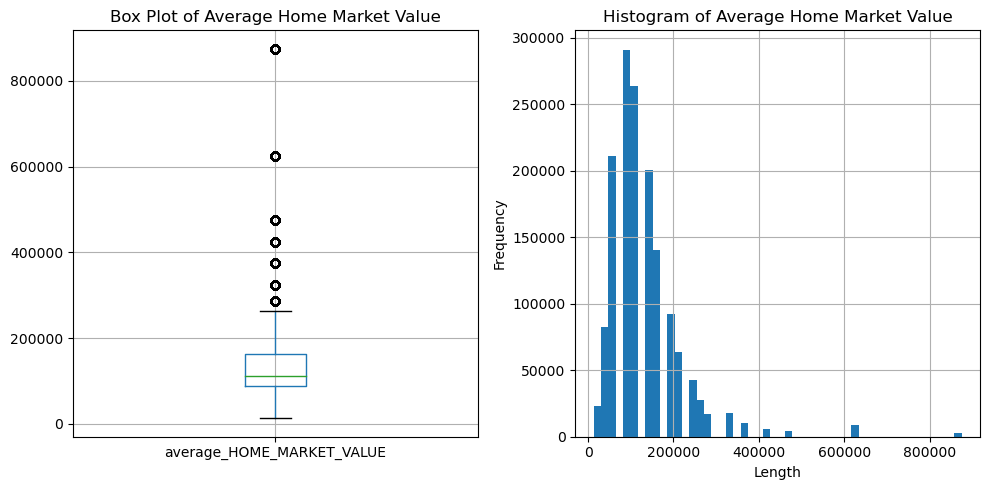

In [46]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='average_HOME_MARKET_VALUE')
plt.title('Box Plot of Average Home Market Value')

# Histogram
plt.subplot(1, 2, 2)
df['average_HOME_MARKET_VALUE'].hist(bins=50)
plt.title('Histogram of Average Home Market Value')
plt.xlabel('Length')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

The average home market value data is right-skewed with a mean of 131,844.75 and a median of 112,499.50. There's a wide range of values, as shown by the large standard deviation. This variation and the presence of high-value outliers could affect the performance of regression models. Normalization or standardization of this feature might be beneficial if using algorithms sensitive to the scale of the data, such as linear regression, logistic regression, or neural networks. However, if using tree-based models like decision trees or random forests, normalization might not be necessary as these models are not sensitive to the scale of the input variables.

##### Age 

In [47]:
df.Age.describe().apply(lambda x: f"{x:,.2f}")

count    1,506,458.00
mean            56.97
std             14.51
min             24.00
25%             47.00
50%             56.00
75%             66.00
max            115.00
Name: Age, dtype: object

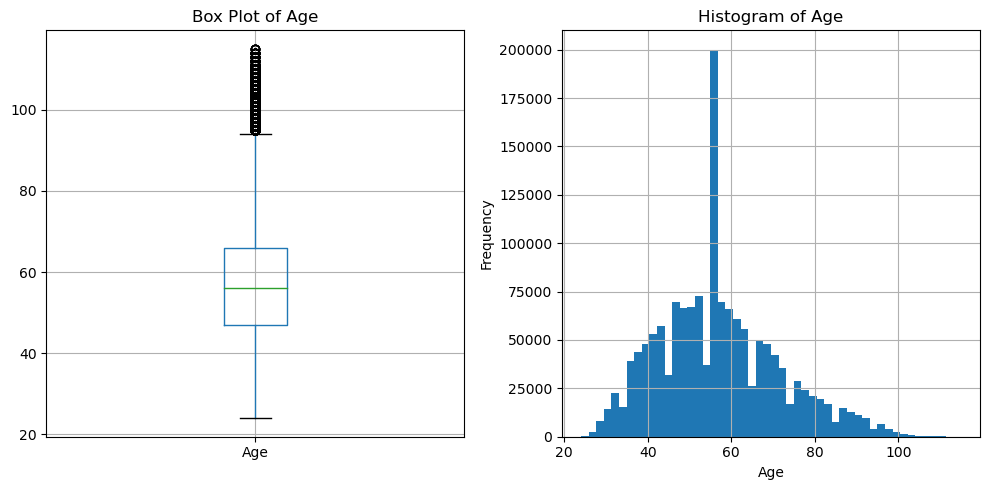

In [48]:
# Plotting a box plot
plt.figure(figsize=(10, 5))

# Box plot
plt.subplot(1, 2, 1)
df.boxplot(column='Age')
plt.title('Box Plot of Age')

# Histogram
plt.subplot(1, 2, 2)
df['Age'].hist(bins=50)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plots
plt.tight_layout()
plt.show()

In [49]:
# Drop rows where Age is greater than 100
df = df[df['Age'] <= 100]

The customer age data shows a symmetrical distribution with a mean and median around 56 years, indicating a customer base that is predominantly middle-aged to senior. The standard deviation suggests a moderately wide age range. Outliers, particularly those of advanced age, are present but not in numbers likely to heavily skew the overall distribution. While these outliers may not impact models insensitive to input scale like decision trees, they could influence models that depend on the distribution of the feature, such as linear regression. Thus, we decided to drop the rows with customers of Age > 100

# Data Cleaning and Feature Engineering 


In [ ]:
# Fill missing values in 'CUST_START_DATE' with values from 'CUST_ORIG_DATE'
df['CUST_START_DATE'] = df['CUST_START_DATE'].fillna(df['CUST_ORIG_DATE'])

We decided to fill all the NA values in the 'CUST_START_DATE' column with the correspondent value in the 'CUST_ORIG_DATE' as the first represents the day the customer current plan started, while the second represents the day the customer became a client, therefore if the plan start day is missing, assuming that the orig day is a good proxy for the start date, we can fill the missing values with the day of origin.

In [ ]:
# Drop rows where the "INCOME" column has missing values
df = df.dropna(subset=['INCOME', 'INDIVIDUAL_ID', 'ADDRESS_ID', 'HOME_MARKET_VALUE', 'MARITAL_STATUS', 'HAS_CHILDREN', 'HOME_OWNER'])

# Checking for missing values inside the dataframes 
missing_values = df.isna().sum() 

# Getting the relatives values for each dataframe 
percentage_missing_values = (df.isna().sum() / len(df)) 
percentage_missing_values = percentage_missing_values.round(2)  # Rounds the values to 2 decimal places

# Displaying the results 
display(missing_values, percentage_missing_values)

After identifying that seven critical columns contain 7% and 9% missing values, we have decided to drop the rows with these missing values. This step is essential for preserving the quality and accuracy of our data analysis, precisely for the prediction of the customer value. Furthermore we dropped the istances of missing values in the 'INDIVIDUAL_ID' and 'ADDRESS_ID' as they are necessary for identifying individuals in our tasks. Regarding the "SUSP_DATE" column we assumed that the very high number of missing values is explained by the fact that the vast majority of customers do not have a ending date for their policy planned out yet, and therefore the NA are left in the dataset for now, they will be taken care during the preparation for the Churn analysis.
Therefore the dataset, after undergoing a process of datacleaning, has a good completeness for the first task of predicting the customer value but could fall a little short in the churn analysis, due to the huge number of missing values in the 'SUSPD_DATE' column.

In [ ]:
# Renaming the "HAS_CHILDREN" column to N_CHILDREN
df.rename(columns={'HAS_CHILDREN': 'N_CHILDREN'}, inplace=True)

# Create a new column 'HAS_CHILDREN' based on 'N_CHILDREN' values
df['HAS_CHILDREN'] = df['N_CHILDREN'].apply(lambda x: 0 if x == 0 else 1)

The column 'HAS_CHILDREN' initially contained 6 values: from 0 to 6.0, that we assume indicated the number of children, but in the column description the column was intended to inform if the customer had or didnt have children, therefore we renamed the column to 'N_CHILDREN', indicating the number of children of the customer and created a new column, called 'HAS_CHILDREN' with binary values indicating the presence or not of children.

In [ ]:
# Transforming "Y" and "N" values in the "ADVANCED_STUDIES" column into a binary variable
df['ADVANCED_STUDIES'] = df['ADVANCED_STUDIES'].map({'Y': 1, 'N': 0})

# Transforming "Married" and "Single" values in the "MARITAL_STATUS" column into a binary variable
df['MARITAL_STATUS'] = df['MARITAL_STATUS'].map({'Married': 1, 'Single': 0})

We transformed the 'ADVANCED_STUDIES' and 'MARITAL_STATUS' values into dummy variables, where 0 corresponds to not having attended advanced studies or being single and 1 the contrary.

In [ ]:
# Convert all the dates in DateTime format
df['CUST_START_DATE'] = pd.to_datetime(df['CUST_START_DATE'])
df['CUST_ORIG_DATE'] = pd.to_datetime(df['CUST_ORIG_DATE'])
df['DATE_OF_BIRTH'] = pd.to_datetime(df['DATE_OF_BIRTH'])
df['SUSPD_DATE'] = pd.to_datetime(df['SUSPD_DATE'])

Successfully changed the datatype of all the "Date" columns from string to DateTime

In [ ]:
# Process the 'HOME_MARKET_VALUE' column
# Split the string by the dash and expand to new columns
df[['low_HOME_MARKET_VALUE', 'high_HOME_MARKET_VALUE']] = df['HOME_MARKET_VALUE'].str.split(' - ', expand=True)

# Convert the split strings to numeric values, coerce errors to NaN
df['low_HOME_MARKET_VALUE'] = pd.to_numeric(df['low_HOME_MARKET_VALUE'], errors='coerce')
df['high_HOME_MARKET_VALUE'] = pd.to_numeric(df['high_HOME_MARKET_VALUE'], errors='coerce')

# Calculate the midpoint of the range
df['average_HOME_MARKET_VALUE'] = (df['low_HOME_MARKET_VALUE'] + df['high_HOME_MARKET_VALUE']) / 2

# Now, if you need to convert this midpoint to an integer, you can do so safely since NaNs will not raise an error
df['average_HOME_MARKET_VALUE'] = df['average_HOME_MARKET_VALUE'].astype(int, errors='ignore')

# Check if a 'price' column is always positive and has two decimal places
(df['average_HOME_MARKET_VALUE'] > 0).value_counts()

In [ ]:
# Filter the dataframe to show only rows where 'average_HOME_MARKET_VALUE' is negative
negative_values_df = df[df['average_HOME_MARKET_VALUE'] < 0]

# Display the rows with negative 'average_HOME_MARKET_VALUE'
negative_values_df[['average_HOME_MARKET_VALUE']].sum()


In [ ]:
# Drop rows where the "HOME_MARKET_VALUE" column has missing values
df = df.drop(subset= ['HOME_MARKET_VALUE'], axis= 1)

# Dropping 'low_HOME_MARKET_VALUE' and 'high_HOME_MARKET_VALUE' from the DataFrame
df = df.drop(['low_HOME_MARKET_VALUE', 'high_HOME_MARKET_VALUE'], axis=1)

# Dropping na values in 'average_HOME_MARKET_VALUE'
df = df.dropna(subset= ['average_HOME_MARKET_VALUE'])

The "HOUSE_MARKET_VALUE" Column was initialy formatted as string, this could lead to some problems if later we want to do some mathematical operations on the column, therefore we decided to get the average of the two values, as the column shows a price range. Later we performed a negativity check that outputted 2565 false values, however when directly checking for negative values the dataframe was empty, therefore all the false values of the negativity check can be explained by NA values that generated during the creation of the average_HOME_MARKET_VALUE column by coercing the errors. The decision was then to drop this newly generated missing values
The consistency analysis conducted on the dataset involved several key steps to ensure data quality and adherence to domain rules. The dataset presented some inconsistencies in the format of some features and some other features were in the wrong type, but by changing the datatype of 'INDIVIDUAL_ID' and 'ADDRESS_ID' to integers, the analysis was simplified. The transformation of the 'HAS_CHILDREN' column into 'N_CHILDREN' and the creation of a binary 'HAS_CHILDREN' column improved clarity regarding the presence of children. The conversion of 'ADVANCED_STUDIES' and 'MARITAL_STATUS' into dummy variables, and the standardization of binary values across columns further aligned the data with domain constraints. The successful change of 'Date' columns to DateTime format and the handling of the 'HOUSE_MARKET_VALUE' column by calculating averages and addressing negative values indicate a thorough effort to maintain consistency. This process not only enhanced data clarity but also ensured that all columns conform to expected formats and value ranges, crucial for accurate and reliable analysis.

## Bivariate Analysis

In [50]:
df.columns

Index(['INDIVIDUAL_ID', 'ADDRESS_ID', 'CUST_ORIG_DATE', 'DATE_OF_BIRTH',
       'SOCIAL_SECURITY_NUMBER', 'CUST_START_DATE', 'CURR_ANN_AMT_CAR',
       'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'INCOME', 'N_CHILDREN',
       'LENGTH_OF_RESIDENCE', 'MARITAL_STATUS', 'HOME_MARKET_VALUE',
       'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES',
       'SUSPD_DATE', 'HAS_CHILDREN', 'average_HOME_MARKET_VALUE', 'Age',
       'DAYS_SINCE_POLICY_START', 'DAYS_AS_CUSTOMER'],
      dtype='object')

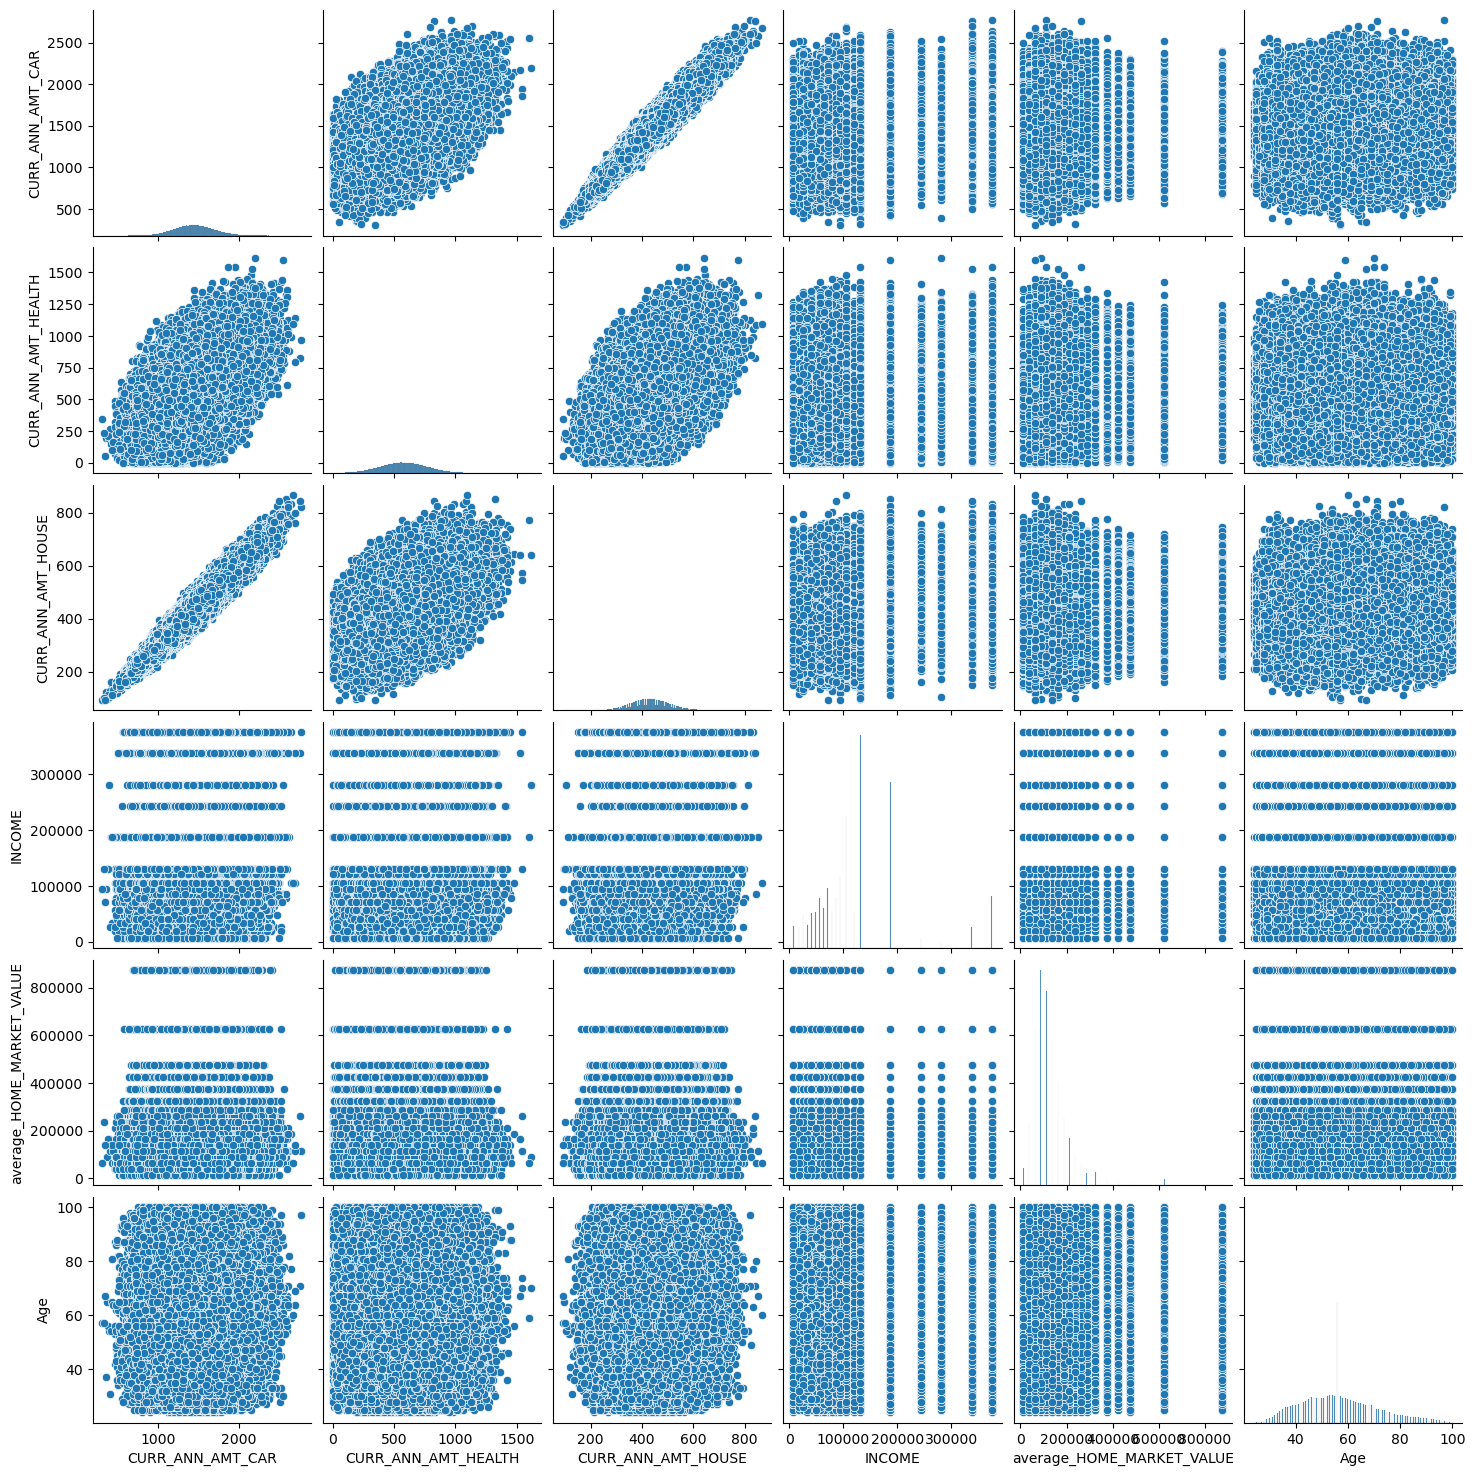

In [51]:
# Generating a scatter plot matrix among the numerical variabkes 
sns.pairplot(df, vars=['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 
                       'CURR_ANN_AMT_HOUSE', 'INCOME', 'average_HOME_MARKET_VALUE', 'Age'])

   
plt.show()

##### Correlation Analysis - Pearson

In [52]:
# Generating the correlation matrix 
correlation_matrix = df.corr(method='pearson', numeric_only= True)

# Display the correlation matrix
display(correlation_matrix)


,INDIVIDUAL_ID,ADDRESS_ID,CURR_ANN_AMT_CAR,CURR_ANN_AMT_HEALTH,CURR_ANN_AMT_HOUSE,INCOME,N_CHILDREN,LENGTH_OF_RESIDENCE,MARITAL_STATUS,HOME_OWNER,COLLEGE_DEGREE,GOOD_CREDIT,ADVANCED_STUDIES,HAS_CHILDREN,average_HOME_MARKET_VALUE,Age,DAYS_SINCE_POLICY_START,DAYS_AS_CUSTOMER
INDIVIDUAL_ID,1.000000,0.987068,-0.012187,-0.006393,-0.011563,-0.045275,-0.042078,-0.028004,-0.107656,0.030049,0.023498,-0.074708,-0.025819,-0.046427,-0.049581,0.045075,0.013161,0.013599
ADDRESS_ID,0.987068,1.000000,-0.013933,-0.007302,-0.013191,-0.054759,-0.046764,-0.029922,-0.118245,0.032469,0.024384,-0.080681,-0.030193,-0.051544,-0.056004,0.049759,0.014971,0.015445
CURR_ANN_AMT_CAR,-0.012187,-0.013933,1.000000,0.518069,0.962715,0.132574,-0.031601,0.176919,0.118990,0.098801,0.088434,0.053715,0.059904,-0.034903,0.024200,0.088388,0.026424,0.027848
CURR_ANN_AMT_HEALTH,-0.006393,-0.007302,0.518069,1.000000,0.498479,0.069064,-0.017286,0.091377,0.061182,0.051568,0.045811,0.027653,0.031043,-0.018750,0.011973,0.045476,0.012350,0.013287
CURR_ANN_AMT_HOUSE,-0.011563,-0.013191,0.962715,0.498479,1.000000,0.127829,-0.030172,0.170481,0.114179,0.095307,0.084846,0.051719,0.057607,-0.033417,0.023242,0.085134,0.025313,0.026690
INCOME,-0.045275,-0.054759,0.132574,0.069064,0.127829,1.000000,0.043549,0.050333,0.245169,0.184016,0.123523,0.267368,0.421132,0.048243,0.330329,-0.010096,0.023026,0.023620
N_CHILDREN,-0.042078,-0.046764,-0.031601,-0.017286,-0.030172,0.043549,1.000000,-0.098783,0.148349,0.060471,0.038818,0.009165,0.009047,0.901362,0.010089,-0.185313,-0.044461,-0.045439
LENGTH_OF_RESIDENCE,-0.028004,-0.029922,0.176919,0.091377,0.170481,0.050333,-0.098783,1.000000,0.191937,0.242657,0.030777,0.038942,0.015417,-0.109407,-0.132386,0.289471,0.095825,0.097864
MARITAL_STATUS,-0.107656,-0.118245,0.118990,0.061182,0.114179,0.245169,0.148349,0.191937,1.000000,0.294926,0.077049,0.081237,0.108364,0.164941,0.055049,0.115235,0.050843,0.051923
HOME_OWNER,0.030049,0.032469,0.098801,0.051568,0.095307,0.184016,0.060471,0.242657,0.294926,1.000000,0.101925,0.122080,0.077054,0.067681,-0.074072,0.114754,0.051808,0.052662


The provided data analysis reveals strong positive correlations between annual payments for car and house insurance, and a moderate positive correlation between car insurance payments and health insurance payments. A moderate positive relationship is also evident between income and home market values, suggesting that wealthier individuals tend to own more valuable homes. Weak correlations are observed between insurance payments and factors like the number of children, length of residence, home ownership status, college degree, and credit quality, indicating these variables have minimal linear relationships with insurance costs. The presence of outliers in income and home market values suggests variability in the financial status among the individuals in the dataset. It's important to remember that correlation does not imply causation; these findings simply describe tendencies within the data, not direct influences.

#### Q1.2 Please describe in two paragraphs the main data insights. Connect the insight with the business  (10 points)


The in-depth analysis of ABC Insurance's customer database has shed light on several critical dimensions of data quality and provided insightful analytical findings, crucial for informing strategic decisions. Initially, the completeness assessment unearthed significant voids in vital customer data fields such as 'CUST_START_DATE', 'MARITAL_STATUS', and 'HOME_MARKET_VALUE', with missing data affecting up to 26% of records in certain fields. This lack of complete data presents a substantial hurdle in comprehensively understanding customer journeys and effectively segmenting the customer base for targeted marketing and engagement strategies. Additionally, the consistency analysis exposed several discrepancies in the formatting of date fields and numerical values, particularly within the 'HOUSE_MARKET_VALUE' column, necessitating a thorough standardization process to ensure the accuracy of subsequent analyses. The process of ensuring data uniqueness was also critical, leading to the identification and elimination of duplicate records based on 'INDIVIDUAL_ID' and 'CUST_START_DATE', a step that was paramount in preserving the dataset's integrity and the reliability of analytical outcomes.

Digging deeper through univariate analysis, the exploration of numerical variables such as insurance payments and income levels unveiled a striking disparity. Income levels exhibited a broad range, indicating a diverse customer base, in stark contrast to the more uniform distribution of insurance payments. This observation hints at a potential disconnect in ABC Insurance's pricing strategy, which may not adequately accommodate the varied financial backgrounds of its customers. Bivariate analysis provided further insights, uncovering a surprising lack of correlation between insurance payments and customer income, alongside a pronounced correlation among the payments for different types of insurance. These findings point towards significant opportunities for ABC Insurance to refine its pricing models to more closely align with the financial realities of its diverse customer base. Additionally, the correlations between different types of insurance payments suggest promising avenues for developing more effective product bundling and cross-selling strategies, potentially enhancing customer value and fostering greater loyalty within the customer base.

## Question 2: Predictive Modeling estimate Costumer Value (35 points)

#### Background: ABC Insurance aims to optimize its marketing and product offerings by predicting which customers are likely to be the most valuable. The CURR_ANN_AMT_CAR, CURR_ANN_AMT_HEALTH, and CURR_ANN_AMT_HOUSE fields in the df_customer dataset can serve as indicators of customer value.

#### Q2.1 Build a baseline model to estimate the costumer value based on their characteristics. (15 points)

In [53]:
from sklearn.preprocessing import StandardScaler

# Standardizing all the features that are not a dummy variable 
# Dropping INDIVIDUAL_ID and ADDRESS_ID that do not need to be scaled 
df_no_id = df.drop(['INDIVIDUAL_ID', 'ADDRESS_ID', 'CURR_ANN_AMT_CAR',
       'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE', 'SUSPD_DATE'], axis= 1)

# Identify numeric columns that are not dummy variables
numeric_cols = df_no_id.select_dtypes(include=['float64', 'int64']).columns
non_dummy_cols = [col for col in numeric_cols if not set(df[col].unique()).issubset({0, 1})]

# Standardize these columns
scaler = StandardScaler()
df[non_dummy_cols] = scaler.fit_transform(df[non_dummy_cols])

In [54]:
# Generating the target variable by getting the mean of the Insurance Payments 
df['y'] = df[['CURR_ANN_AMT_CAR', 'CURR_ANN_AMT_HEALTH', 'CURR_ANN_AMT_HOUSE']].mean(axis=1)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extracting features and target
X = df[['INCOME', 'N_CHILDREN', 'LENGTH_OF_RESIDENCE', 'average_HOME_MARKET_VALUE', 'Age', 'DAYS_SINCE_POLICY_START', 'DAYS_AS_CUSTOMER','HOME_OWNER',
       'COLLEGE_DEGREE', 'GOOD_CREDIT', 'ADVANCED_STUDIES', 'MARITAL_STATUS']]
y = df['y']  

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the linear regression model
linear_reg = LinearRegression()

# Performing the RFE
rfe = RFE(estimator=linear_reg, n_features_to_select = 8, step=1)
rfe.fit(X_train, y_train)

# Evaluating the model
y_pred = rfe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Printing the number of features selected, which features were selected, the MSE and the RMSE 
selected_features = X.columns[rfe.support_]

print(f"Selected Features: {selected_features}")
print(f"Linear Regression MSE: {mse}")


Selected Features: Index(['INCOME', 'N_CHILDREN', 'LENGTH_OF_RESIDENCE', 'Age', 'HOME_OWNER',
       'COLLEGE_DEGREE', 'GOOD_CREDIT', 'MARITAL_STATUS'],
      dtype='object')
Linear Regression MSE: 21335.24523770378


In [56]:
# Evaluating the performance of the model on the training data 

# Predicting on training data
y_train_pred = rfe.predict(X_train)

# Calculating MSE for the training data
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculating RMSE for the training data
rmse_train = np.sqrt(mse_train)

# Printing the training MSE and RMSE
print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")

Training MSE: 21363.57336584453
Training RMSE: 146.16283168386047


We started our process by developing a linear model. Because linear regression models are simple to interpret and easy to train, they are often the first model to be fitted to a new dataset and used as a baseline for evaluating other, more complex regression models. 
We started by preprocessing the data, where numeric features excluding certain IDs and the target variable components were standardized to have zero mean and unit variance. We created the target variable y, as the mean of three insurance payment types, believed to be a good enough proxy for the customer value. The dataset is then split into features and target sets, followed by a training and testing split with a 20% test size.

Recursive Feature Elimination (RFE), is used to select the most significant features, aiming to improve model simplicity and predictive performance. The model is trained on the training set and evaluated on the test set using Mean Squared Error (MSE) and Root Mean Squared Error (RMSE), which measure the model's prediction accuracy.

By analysing the performance on the training data and on the test data we can see that the MSE is almost the same, thus we can conclude that the poor performance of the linear model in predicting the customer value is due to the bias of the model in the prediction.

#### Q2.2 Build a second model to estimate the costumer value based on their characteristics and compare model performance. (10 points)

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

# Extracting features and target
X = df[['INCOME', 'N_CHILDREN', 'LENGTH_OF_RESIDENCE', 'DAYS_AS_CUSTOMER',
       'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'MARITAL_STATUS']]
y = df['y']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a polynomial regression model pipeline
degree = 3
poly_reg_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Fitting the model
poly_reg_model.fit(X_train, y_train)

# Predicting and evaluate
y_pred = poly_reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)


# Outputting the MSE
print(f"Polynomial Regression MSE: {mse}")

Polynomial Regression MSE: 20948.09784809381


In [58]:
'''from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initializing and fitting the Random Forest model
random_forest_reg = RandomForestRegressor(random_state=42)
random_forest_reg.fit(X_train, y_train)

# Predicting and evaluating
y_pred_rf = random_forest_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Printing the results
print(f"Random Forest MSE: {mse_rf}")

'''

# Took a long time to run --> MSE: 21549.3226


'from sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error\n\n# Initializing and fitting the Random Forest model\nrandom_forest_reg = RandomForestRegressor(random_state=42)\nrandom_forest_reg.fit(X_train, y_train)\n\n# Predicting and evaluating\ny_pred_rf = random_forest_reg.predict(X_test)\nmse_rf = mean_squared_error(y_test, y_pred_rf)\nrmse_rf = np.sqrt(mse_rf)\n\n# Printing the results\nprint(f"Random Forest MSE: {mse_rf}")\n\n'

In [59]:
'''

from sklearn.model_selection import RandomizedSearchCV

# Defineing the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Initializing the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)

# Initializing the RandomizedSearchCV
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fitting the model
random_search.fit(X_train, y_train)

# Predicting and evaluate
best_model = random_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)
mse_optimized = mean_squared_error(y_test, y_pred_optimized)
rmse_optimized = np.sqrt(mse_optimized)

print(f"Optimized Random Forest MSE: {mse_optimized}")

'''
# Took a very long time to run --> MSE: 21631.51287090112





'\n\nfrom sklearn.model_selection import RandomizedSearchCV\n\n# Defineing the parameter grid\nparam_dist = {\n    \'n_estimators\': [100, 200, 300, 400, 500],\n    \'max_depth\': [None, 10, 20, 30, 40, 50],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n}\n\n# Initializing the Random Forest Regressor\nrf = RandomForestRegressor(random_state=42)\n\n# Initializing the RandomizedSearchCV\nrandom_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, scoring=\'neg_mean_squared_error\', random_state=42)\n\n# Fitting the model\nrandom_search.fit(X_train, y_train)\n\n# Predicting and evaluate\nbest_model = random_search.best_estimator_\ny_pred_optimized = best_model.predict(X_test)\nmse_optimized = mean_squared_error(y_test, y_pred_optimized)\nrmse_optimized = np.sqrt(mse_optimized)\n\nprint(f"Optimized Random Forest MSE: {mse_optimized}")\n\n'

The focus now shifts to exploring more complex models beyond linear regression, specifically Polynomial Regression and Random Forest Regression.
The feature utilized were the same as the linear regression and the dataset was divided  into training and testing sets, maintaining the same 80-20 split as before.

The first model explored is a Polynomial Regression, which extends linear regression by introducing polynomial features of a specified degree, in this case, 3.
This approach allows for capturing nonlinear relationships between the features and the target. A pipeline is created to streamline the transformation of input features into polynomial features followed by applying linear regression. After training on the training set, the model's performance is assessed on the test set using the Mean Squared Error (MSE) metric.

Following the polynomial model, a Random Forest Regressor is employed. Random Forest is an ensemble learning method known for its robustness and ability to handle non-linear data through multiple decision trees, reducing the risk of overfitting. After fitting the model to the training data, predictions are made on the test set. The model's accuracy is evaluated using MSE .

Finally we used RandomizedSearchCV for hyperparameter tuning of a Random Forest Regressor to optimize its performance. 
After fitting RandomizedSearchCV to the training data, the best model is identified and used to make predictions on the test set. The performance of this optimized model is evaluated using the Mean Squared Error (MSE.

#### Model performance comparison 

The Polynomial Regression Model emerges as the most accurate model for this particular dataset, closely followed by the optimized Random Forest Model. The Linear Model, while simpler and less computationally demanding, falls short of the Polynomial Model's performance but still outperforms the unoptimized Random Forest. The improvement in MSE from the Random Forest to the Optimized Random Forest highlights the value of hyperparameter tuning in enhancing model performance. 

Consequently, when considering accuracy, computational efficiency, and the evaluation metrics, the Polynomial Regression Model is identified as the optimal choice among the three. However, it's crucial to acknowledge that all models exhibited limitations in accurately predicting customer value, evidenced by substantial errors. This discrepancy can be attributed to a pronounced bias influencing predictions, a conclusion supported by the convergence of training and testing errors across the models.


#### Q2.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)


From the analysis conducted, it became evident that the current dataset does not facilitate the development of a model capable of adequately performing the intended task. The significantly high error rates in predictions severely compromise the ability to accurately assess customer value, rendering the formulation of an effective customer engagement strategy unattainable.

We recommend to the marketing department head the prioritization of improving data collection efforts, with a special emphasis on the accuracy and reliability of the data. It is our belief that the dataset might contain a substantial amount of inaccurate or biased information, which could account for the observed high bias in model predictions. Furthermore, enhancing the relevance of the data could markedly augment the performance of predictive models. During the exploratory data analysis (EDA) phase, we identified a notably low correlation between the independent features and the target variable, indicating that the current dataset may lack sufficient relevance.

By addressing these issues and focusing on gathering more precise and pertinent data, we anticipate a significant improvement in the predictive models' ability to unearth significant patterns in the data and accurately forecast customer value, thereby laying a stronger foundation for developing a comprehensive customer engagement strategy.

There is one key insight thought that did not derived from the prediction model, but from the EDA, and that is that the insurance payments are disconnected from the Income level of the customers, therefore opening opportunities for ABC Insurance to refine its pricing models to more closely align with the financial realities of its diverse customer base.

## Question 3: Churn Analysis and Prevention Strategy (35 points)

#### Background: Customer retention is a significant concern for ABC Insurance. The df_termination dataset indicates customers who have recently suspended their policies, providing a basis for analyzing churn.

#### Q3.1 Build a baseline model to predict customers that will churn. (15 points)

Accuracy: 0.8876
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000


/Users/nico/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


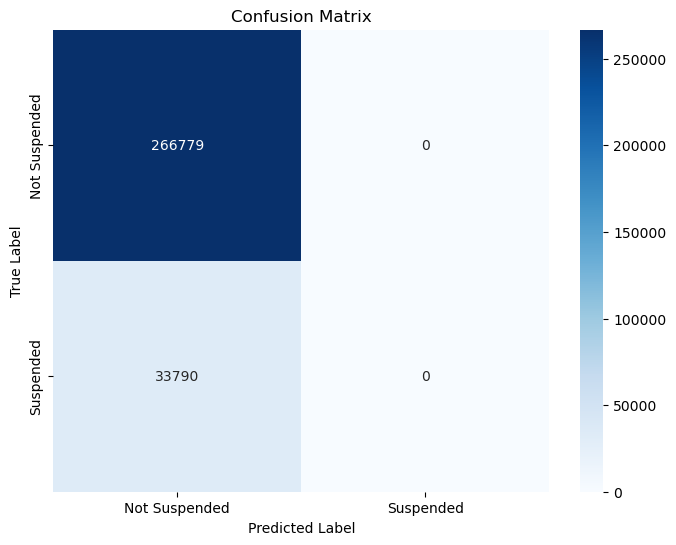

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

X = df[['INCOME', 'N_CHILDREN', 'LENGTH_OF_RESIDENCE', 'DAYS_AS_CUSTOMER',
       'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'MARITAL_STATUS']]
y = df['SUSPD_DATE']

# Initializing Logistic Regression model
model = LogisticRegression()

# RFE for feature selection
selector = RFE(model, n_features_to_select=8)  

# Creating a pipeline that scales data, then performs feature selection, and finally fits the model
pipeline = make_pipeline(scaler, selector, model)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predicting on the test data
y_pred = pipeline.predict(X_test)

# Calculating metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

# Displaying metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Suspended', 'Suspended'], yticklabels=['Not Suspended', 'Suspended'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [65]:
# Identifying the selected features
selected_features = X_train.columns[selector.get_support()]

# Printing the names of the selected features
print("Selected features by RFE:", selected_features.tolist())

Selected features by RFE: ['INCOME', 'N_CHILDREN', 'LENGTH_OF_RESIDENCE', 'DAYS_AS_CUSTOMER', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'MARITAL_STATUS']


We prepared and executed a machine learning pipeline to evaluate the performance of a logistic regression model for the classification task to predict the churn rate. To refine the feature set, RFE (Recursive Feature Elimination) was employed to select the top 8 features deemed most relevant for the prediction task. A logistic regression model was then initialized and incorporated into a pipeline alongside the scaler and feature selector. We choose the logistic model as it is a simple classification algorithm that can predict the probability of a binary response belonging to one class or the other, making it the best suited baseline model.  The dataset was split into training and testing sets to facilitate model evaluation, maintaining class distribution with stratified sampling. After fitting the model on the training data, predictions were made on the test set. We computed and displayed key classification metrics: accuracy, precision, recall, and F1-score, providing a holistic view of the model's performance. Additionally, a confusion matrix was plotted to visually represent the model's prediction accuracy across the different classes, offering insights into its ability to distinguish between the 'Suspended' and 'Not Suspended' categories

#### Q3.2 Build a second model and compare the model performance. (15 points)

Accuracy: 0.8646
Precision: 0.3462
Recall: 0.2305
F1 Score: 0.2768


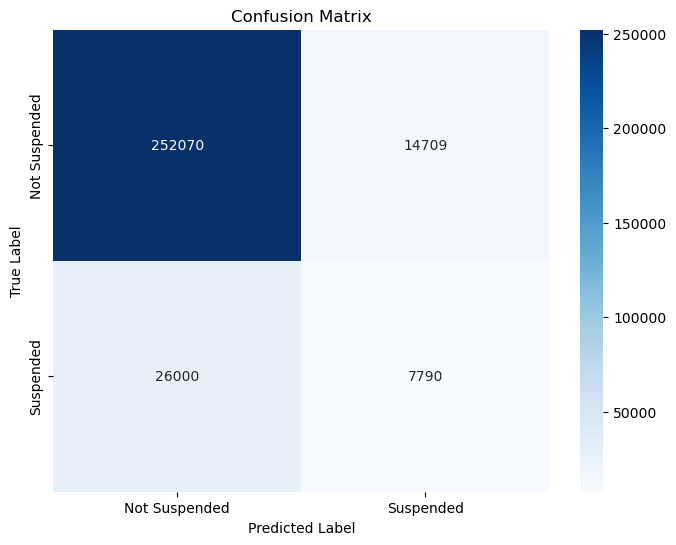

In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Defining the feature set based on the specified features
X = df[['INCOME', 'N_CHILDREN', 'LENGTH_OF_RESIDENCE', 'DAYS_AS_CUSTOMER', 'HOME_OWNER', 'COLLEGE_DEGREE', 'GOOD_CREDIT', 'MARITAL_STATUS']]
y = df['SUSPD_DATE']  

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initializing the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fitting the Random Forest model on the training data
random_forest_model.fit(X_train, y_train)

# Predicting on the test data
y_pred = random_forest_model.predict(X_test)

# Calculating and print metrics
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Suspended', 'Suspended'], yticklabels=['Not Suspended', 'Suspended'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

For the second model we developed a Random Forest Classifier mainly because of his capacity of handling complex dataset with many different features and its ability of capturing non linear relationships between the variables.
We were however limited by the computing capacity of the computer, therefore we decided to not utilize the RFE to select the features and instead use the same features that we used in the logistic classifier.
The data was split into training and testing sets, with 20% reserved for testing, using stratified sampling to maintain the distribution of the target variable. The Random Forest Classifier was configured with 100 trees. After training, the model's efficacy was assessed through the same metrics utilized for the logistic classifier.

##### Model performance comparison

The Logistic Regression model has higher overall accuracy but fails entirely at identifying 'Suspended' cases, as indicated by the zero recall and precision and the confusion matrix.
The Random Forest model has slightly lower accuracy but is much better at identifying 'Suspended' cases, with both precision and recall being greater than zero. This is also reflected in the F1 score, which is a measure of the test's accuracy.
The confusion matrix for Random Forest shows a more balanced classification capability, as it does not classify all instances into one category.
In practical terms, while the Logistic Regression model seems to have a high accuracy, this is misleading because it is only predicting the majority class. The Random Forest model, despite having a lower accuracy, actually provides valuable predictive power for both classes. The ability to identify 'Suspended' instances is crucial for the model to be useful, which makes Random Forest the more effective model in this scenario, despite its lower overall accuracy. 


#### Q3.3 Based on the analysis, suggest a model to the head of marketing and an application scenario. Please justify your decisions. (10 points)

Based on the analysis of the performance metrics and confusion matrices, I would recommend the Random Forest Classifier for the churn analysis to the head of marketing. Despite its slightly lower overall accuracy compared to the Logistic Regression model, the Random Forest Classifier demonstrates a superior ability to correctly identify both 'Not Suspended' and 'Suspended' cases.

That being said, however, the performance of the model is once again poor and we wouldn't recomend the use of the insights derived from it to put in place a mitigation strategy to improve the churn rate of the customers, unless there is no other way to improve the data collected or to derive insights on what drives churn rates in the customer base.
Once again our suggestion is the prioritization of improving data collection efforts, with an emphasis on the accuracy and reliability of the data gathered.